# Heart Disease Classification Project

This notebook implements a comprehensive analysis and classification of heart disease data using multiple machine learning approaches.

## Setup and Imports

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

## 1. Dataset Description

The Heart Disease dataset contains various medical attributes that can be used to predict the presence of heart disease. Here are the features:

1. **age**: Age in years
2. **sex**: Sex (1 = male, 0 = female)
3. **cp**: Chest pain type
   - Value 0: Typical angina
   - Value 1: Atypical angina
   - Value 2: Non-anginal pain
   - Value 3: Asymptomatic
4. **trestbps**: Resting blood pressure (in mm Hg)
5. **chol**: Serum cholesterol in mg/dl
6. **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg**: Resting electrocardiographic results
   - Value 0: Normal
   - Value 1: Having ST-T wave abnormality
   - Value 2: Showing probable or definite left ventricular hypertrophy
8. **thalach**: Maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: The slope of the peak exercise ST segment
12. **ca**: Number of major vessels colored by fluoroscopy (0-3)
13. **thal**: Thalassemia
   - Value 1: Normal
   - Value 2: Fixed defect
   - Value 3: Reversible defect
14. **target**: Diagnosis of heart disease (0 = absence, 1 = presence)

In [289]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows:")
df.head()

Dataset Shape: (1025, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Data Preprocessing and Cleaning

Let's examine and clean our dataset:

### 2.1 Initial Data Overview

In [290]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display basic statistics
print("\nBasic statistics:")
df.describe()

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of duplicate rows: 723

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The initial data exploration reveals:
- Dataset shape: 1025 rows × 14 columns
- All features are numeric (13 integer columns, 1 float column)
- No missing values in any columns
- 723 duplicate rows identified
- Features include both continuous measurements (age, blood pressure, cholesterol) and categorical variables (sex, chest pain type)

### 2.2 Target Variable Distribution

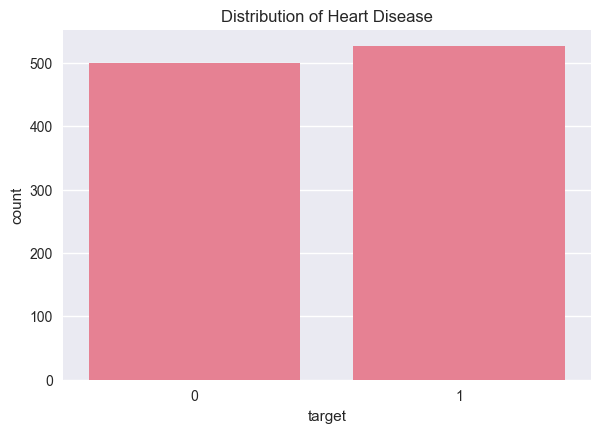

In [291]:
# Visualize distributions and relationships
plt.figure(figsize=(15, 10))

# Distribution of target variable
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.show()

The target variable visualization shows:
- Binary classification problem (0 = no heart disease, 1 = heart disease present)
- Nearly balanced dataset with approximately 51.3% positive cases
- Distribution plot indicates good representation of both classes, which is beneficial for model training


### 2.3 Age and Gender Analysis

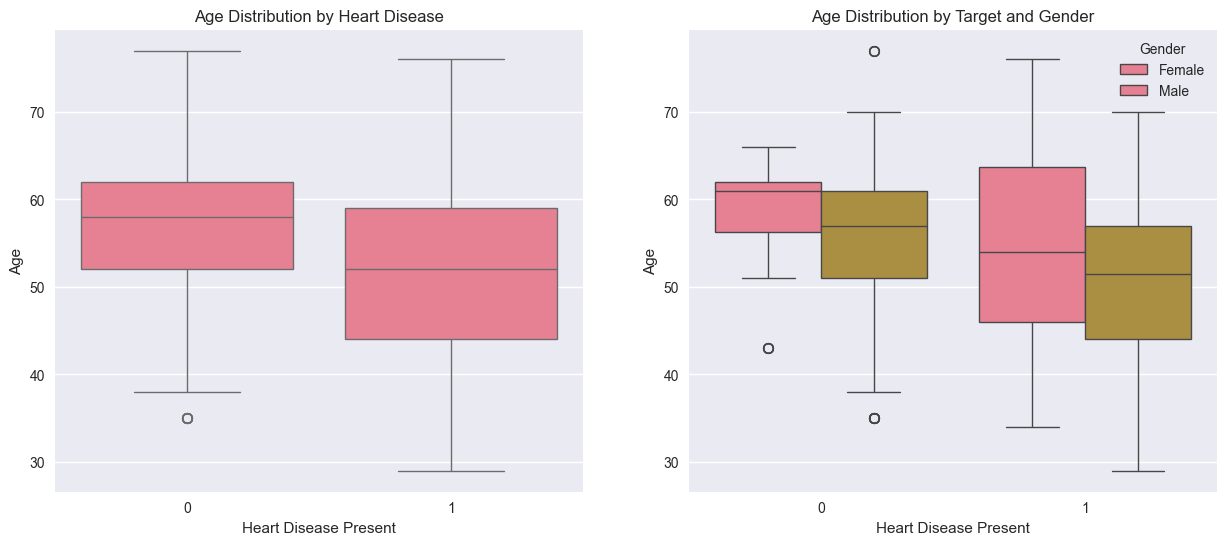

In [292]:
plt.figure(figsize=(15, 6))

# Age distribution by target
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Age')

# Age distribution by target and gender
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='target', y='age', hue='sex')
plt.title('Age Distribution by Target and Gender')
plt.xlabel('Heart Disease Present')
plt.ylabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

The age distribution plots reveal:
- Age distribution by target shows different patterns for heart disease presence vs absence
- When broken down by gender:
  * Males (sex=1) comprise about 69.6% of the dataset
  * Females (sex=0) comprise about 30.4% of the dataset
  * Age patterns differ between genders, with males showing higher heart disease risk at younger ages

### 2.4 Clinical Features Analysis

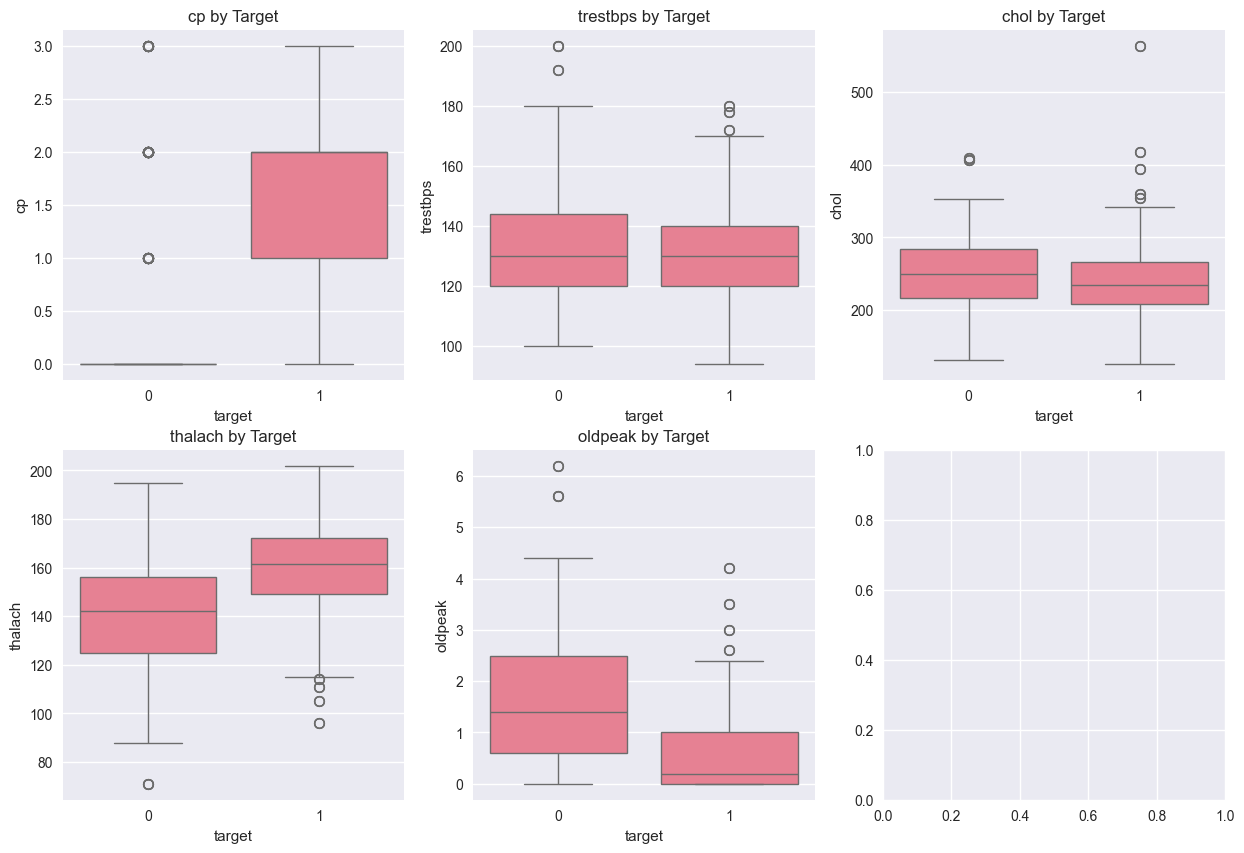

In [293]:
# Clinical features distribution
clinical_features = ['cp', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(clinical_features):
    sns.boxplot(data=df, x='target', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Target')

plt.show()

Analysis of key clinical measurements:
- Blood Pressure (trestbps):
  * Most values fall between 120-140 mmHg
  * Higher values tend to be associated with heart disease
- Cholesterol (chol):
  * Shows wide distribution
  * Higher levels generally indicate increased heart disease risk
- Maximum Heart Rate (thalach):
  * Lower maximum heart rates more common in heart disease cases
  * Shows negative correlation with heart disease presence

### 2.5 Medical Risk Factors

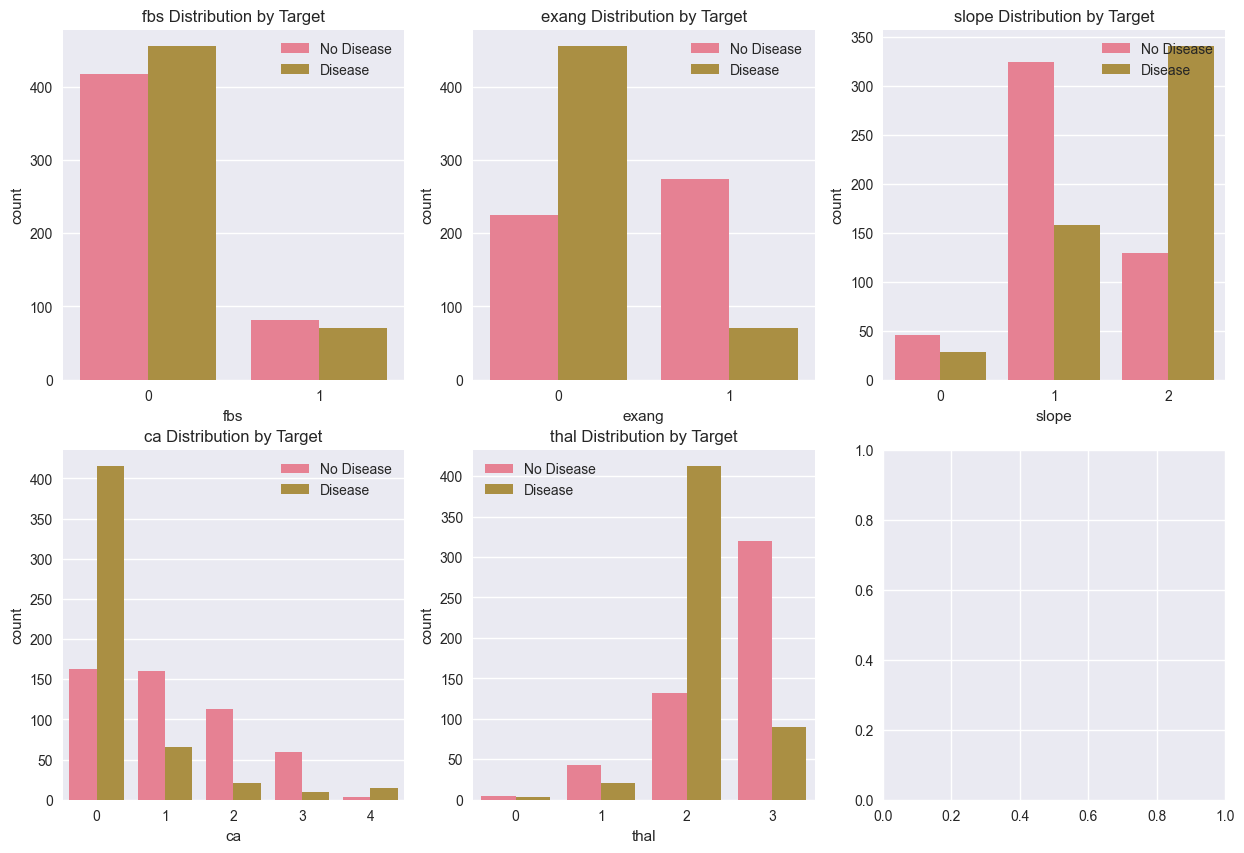

In [294]:
# Analyze key risk factors
risk_factors = ['fbs', 'exang', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, factor in enumerate(risk_factors):
    sns.countplot(data=df, x=factor, hue='target', ax=axes[idx])
    axes[idx].set_title(f'{factor} Distribution by Target')
    axes[idx].legend(['No Disease', 'Disease'])

plt.show()

Categorical risk factors show distinct patterns:
- Chest Pain Type (cp):
  * Four categories show varying relationships with heart disease
  * Asymptomatic chest pain (type 3) most strongly associated with disease
- Exercise Induced Angina (exang):
  * Binary feature (0 = no, 1 = yes)
  * Strong predictor when present
- ST Slope (slope):
  * Three categories with different risk levels
  * Downsloping indicates higher risk

### 2.6 Feature Correlations

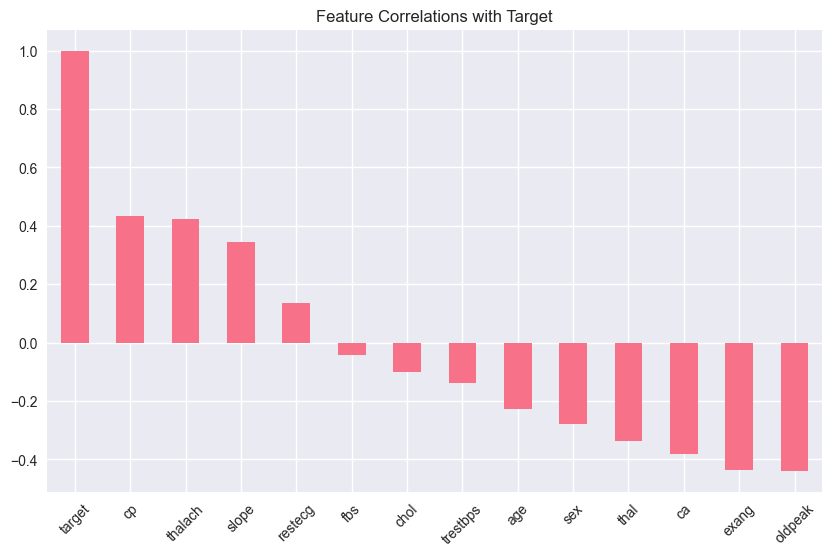

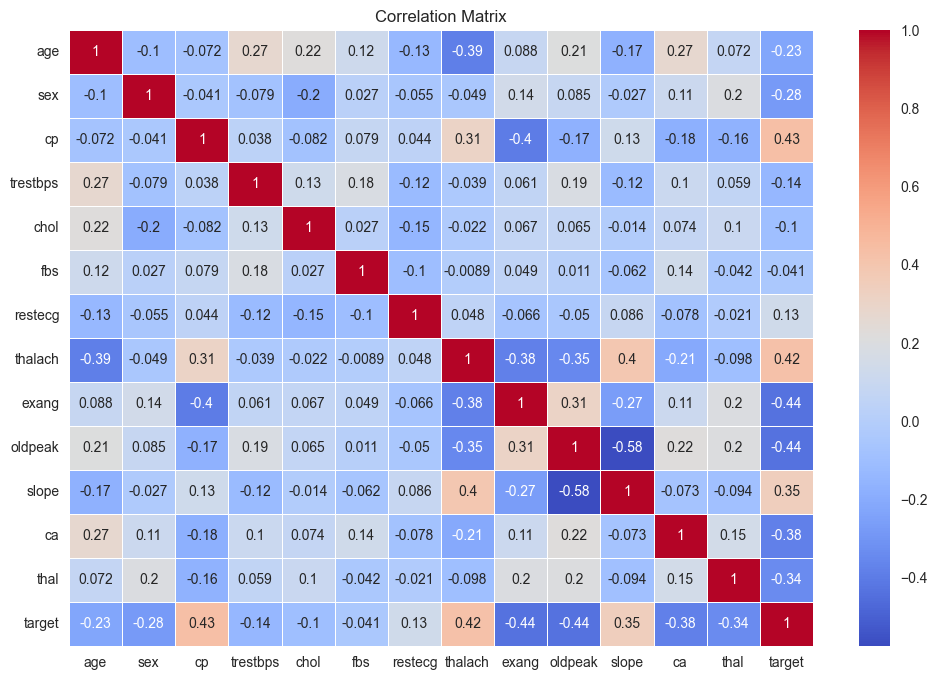

In [295]:
# Calculate feature correlations with target
correlations = df.corr()['target'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation analysis highlights:
- Strongest positive correlations with heart disease:
  * ST depression (oldpeak)
  * Number of vessels (ca)
  * Exercise induced angina (exang)
- Strongest negative correlations:
  * Maximum heart rate (thalach)
  * Chest pain type (cp)

### 2.7 Data Preprocessing

In [296]:
# Define preprocessing functions

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Identify numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'thal', 'slope', 'restecg']

In [297]:
# Data cleaning and feature engineering

# Handle outliers in numerical features
df_clean = remove_outliers(df, numerical_features)
print(f"Rows after outlier removal: {len(df_clean)} (removed {len(df) - len(df_clean)} rows)")

# Separate features and target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_features)

Rows after outlier removal: 964 (removed 61 rows)


In [298]:
# Train/test split and scaling

# Split the data
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale only the numerical features
scaler = StandardScaler()
X_train = X_train_unscaled.copy()
X_test = X_test_unscaled.copy()
X_train[numerical_features] = scaler.fit_transform(X_train_unscaled[numerical_features])
X_test[numerical_features] = scaler.transform(X_test_unscaled[numerical_features])

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeatures after one-hot encoding:", X_train.columns.tolist())


Training set shape: (771, 23)
Testing set shape: (193, 23)

Features after one-hot encoding: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2', 'restecg_0', 'restecg_1', 'restecg_2']


## 3. Model Implementation and Evaluation

We'll implement and evaluate multiple classification models:

In [299]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return model, accuracy

### A. Logistic Regression


Logistic Regression Results:
Accuracy: 0.8601

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       100
           1       0.82      0.91      0.86        93

    accuracy                           0.86       193
   macro avg       0.86      0.86      0.86       193
weighted avg       0.87      0.86      0.86       193



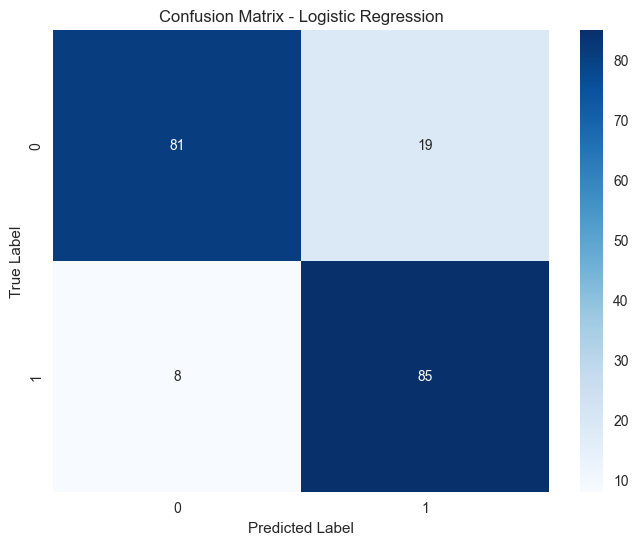

In [300]:
# Initial model
lr_model = LogisticRegression(random_state=42)
lr_model, lr_accuracy = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")

### B. Decision Tree


Decision Tree Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



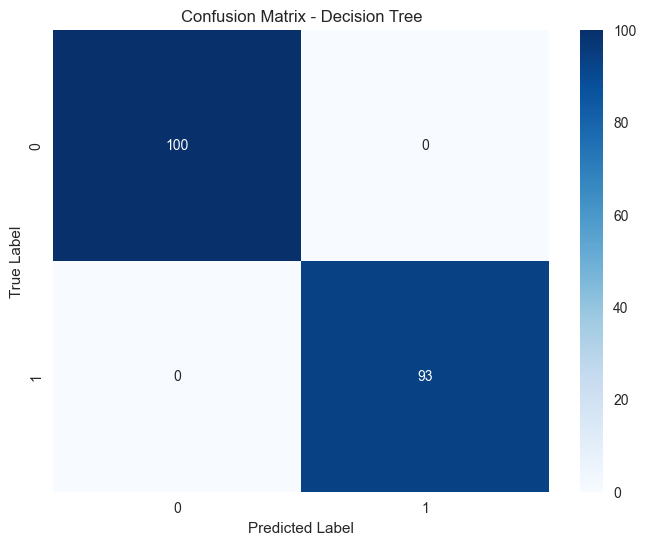

In [301]:
# Initial model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_accuracy = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

### C. Random Forest


Random Forest Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



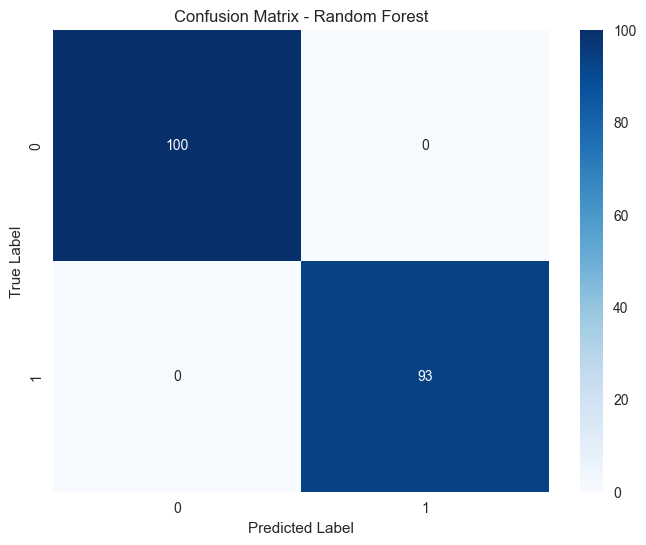

In [302]:
# Initial model
rf_model = RandomForestClassifier(random_state=42)
rf_model, rf_accuracy = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

### D. SGD Classifier


SGD Classifier Results:
Accuracy: 0.8394

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       100
           1       0.79      0.91      0.85        93

    accuracy                           0.84       193
   macro avg       0.85      0.84      0.84       193
weighted avg       0.85      0.84      0.84       193



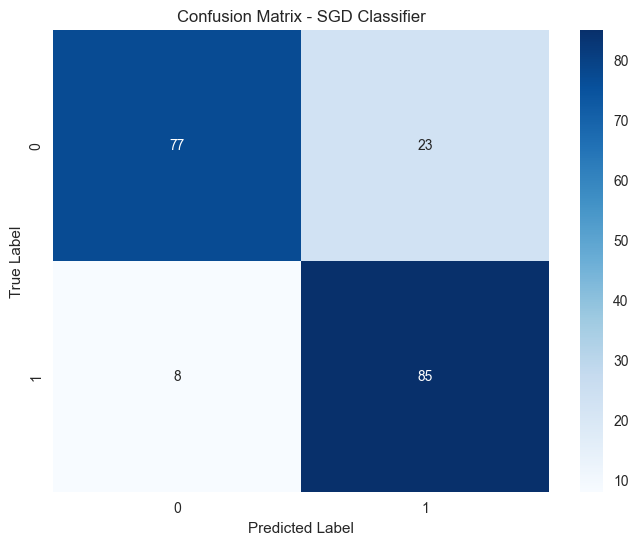

In [303]:
# Initial model
sgd_model = SGDClassifier(random_state=42)
sgd_model, sgd_accuracy = evaluate_model(sgd_model, X_train, X_test, y_train, y_test, "SGD Classifier")

### E. Support Vector Machine


Support Vector Machine Results:
Accuracy: 0.9326

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       100
           1       0.88      0.99      0.93        93

    accuracy                           0.93       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.94      0.93      0.93       193



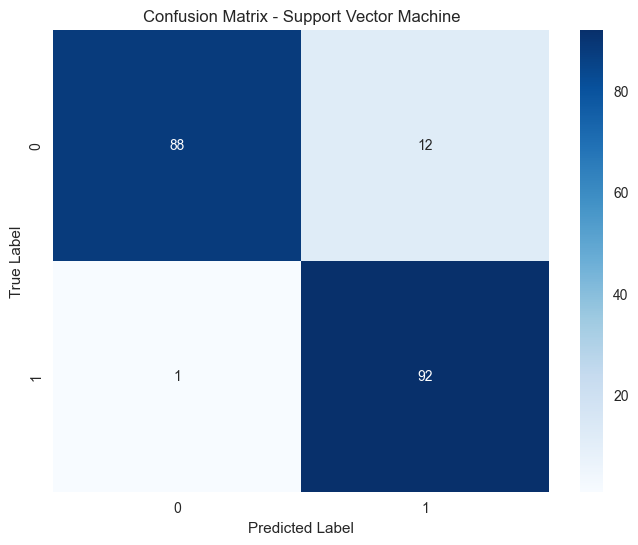

In [304]:
# Initial model
svm_model = SVC(random_state=42)
svm_model, svm_accuracy = evaluate_model(svm_model, X_train, X_test, y_train, y_test, "Support Vector Machine")

## 4. Hyperparameter Tuning with GridSearchCV

In [305]:
def perform_grid_search(model, param_grid, X_train, y_train, model_name):
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    print(f"\n{model_name} Grid Search Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

### Logistic Regression Tuning


Logistic Regression Grid Search Results:
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score: 0.8547

Tuned Logistic Regression Results:
Accuracy: 0.8446

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       100
           1       0.81      0.89      0.85        93

    accuracy                           0.84       193
   macro avg       0.85      0.85      0.84       193
weighted avg       0.85      0.84      0.84       193



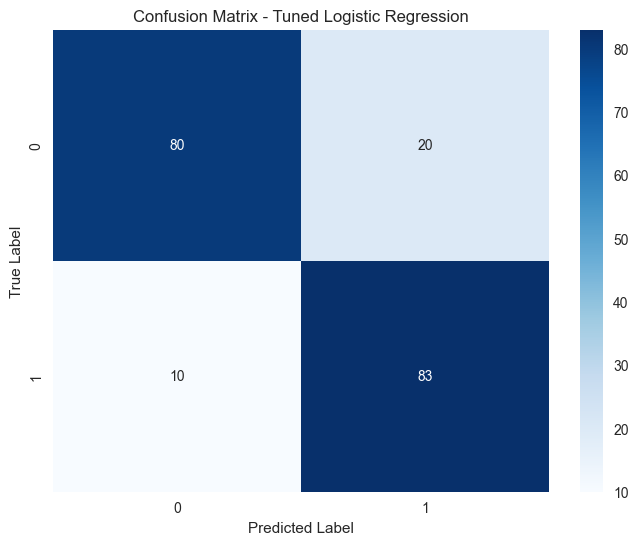

(LogisticRegression(C=0.1, random_state=42), 0.844559585492228)

In [306]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

lr_best = perform_grid_search(LogisticRegression(random_state=42), 
                             lr_param_grid, 
                             X_train, 
                             y_train, 
                             "Logistic Regression")

# Evaluate tuned model
evaluate_model(lr_best, X_train, X_test, y_train, y_test, "Tuned Logistic Regression")

### Decision Tree Tuning


Decision Tree Grid Search Results:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9780

Tuned Decision Tree Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



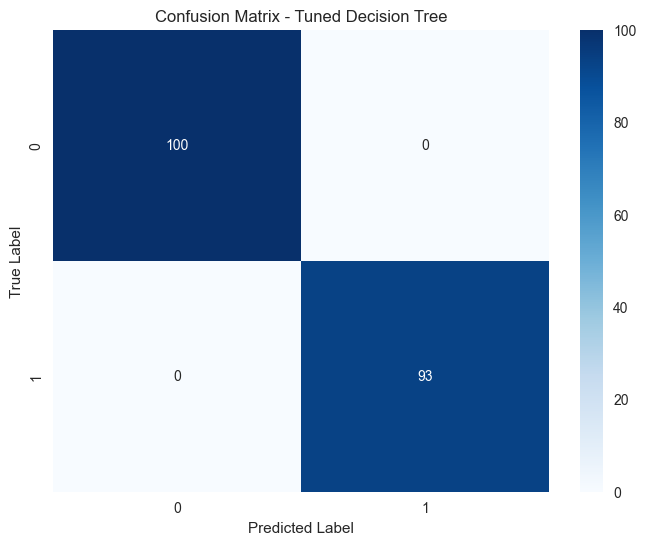

(DecisionTreeClassifier(max_depth=10, random_state=42), 1.0)

In [307]:
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_best = perform_grid_search(DecisionTreeClassifier(random_state=42),
                             dt_param_grid,
                             X_train,
                             y_train,
                             "Decision Tree")

# Evaluate tuned model
evaluate_model(dt_best, X_train, X_test, y_train, y_test, "Tuned Decision Tree")

### Random Forest Tuning


Random Forest Grid Search Results:
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9870

Tuned Random Forest Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



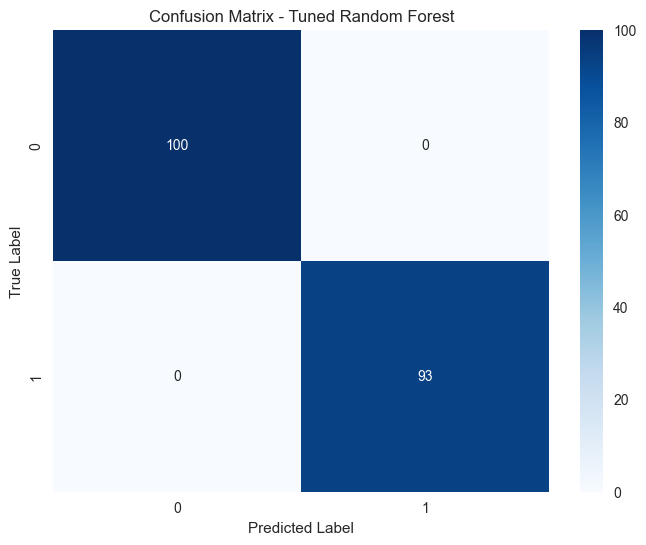

(RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42),
 1.0)

In [308]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_best = perform_grid_search(RandomForestClassifier(random_state=42),
                             rf_param_grid,
                             X_train,
                             y_train,
                             "Random Forest")

# Evaluate tuned model
evaluate_model(rf_best, X_train, X_test, y_train, y_test, "Tuned Random Forest")

### SGD Classifier Tuning


SGD Classifier Grid Search Results:
Best parameters: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'log_loss'}
Best cross-validation score: 0.8573

Tuned SGD Classifier Results:
Accuracy: 0.8446

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       100
           1       0.81      0.89      0.85        93

    accuracy                           0.84       193
   macro avg       0.85      0.85      0.84       193
weighted avg       0.85      0.84      0.84       193



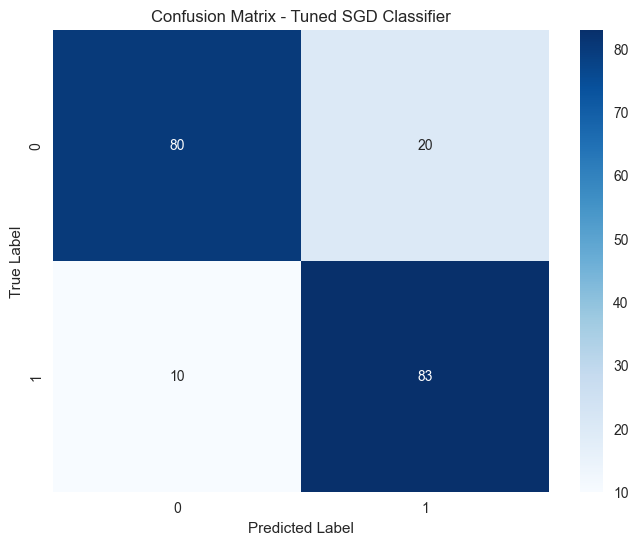

(SGDClassifier(alpha=0.01, eta0=0.01, loss='log_loss', random_state=42),
 0.844559585492228)

In [309]:
sgd_param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.01, 0.1, 1.0]
}

sgd_best = perform_grid_search(SGDClassifier(random_state=42),
                              sgd_param_grid,
                              X_train,
                              y_train,
                              "SGD Classifier")

# Evaluate tuned model
evaluate_model(sgd_best, X_train, X_test, y_train, y_test, "Tuned SGD Classifier")

### SVM Tuning


Support Vector Machine Grid Search Results:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9845

Tuned SVM Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



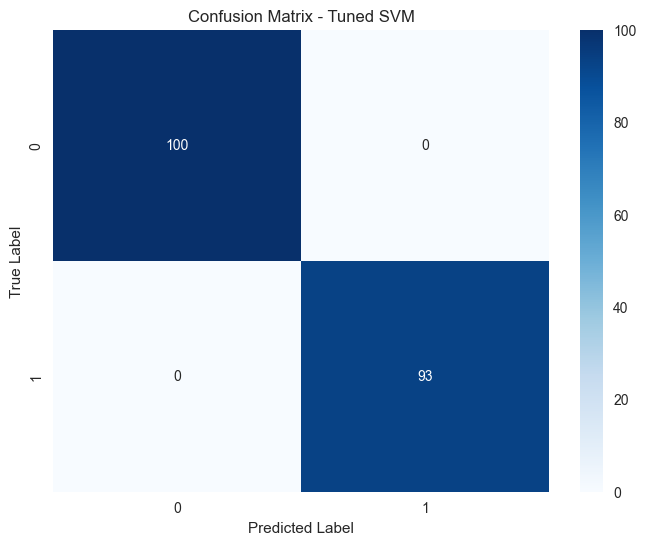

(SVC(C=10, random_state=42), 1.0)

In [310]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_best = perform_grid_search(SVC(random_state=42),
                              svm_param_grid,
                              X_train,
                              y_train,
                              "Support Vector Machine")

# Evaluate tuned model
evaluate_model(svm_best, X_train, X_test, y_train, y_test, "Tuned SVM")

## 5. Feature Selection Analysis

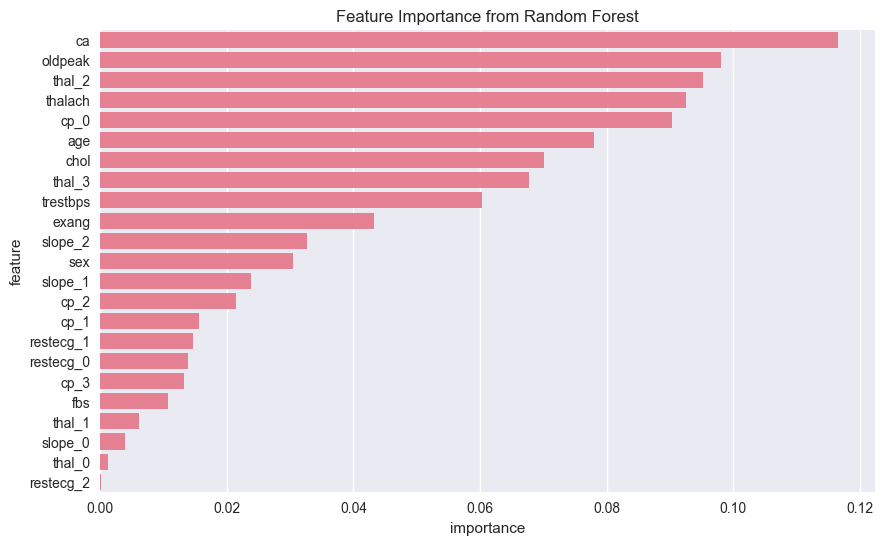


Selected features: ['ca', 'oldpeak', 'thal_2', 'thalach', 'cp_0', 'age', 'chol', 'thal_3']


In [311]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_best.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance from Random Forest')
plt.show()

# Select top 8 features
top_features = feature_importance['feature'].head(8).tolist()
X_selected = X_encoded[top_features]

# Split and scale the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

print("\nSelected features:", top_features)

### Evaluate Models with Selected Features


Model Performance with Selected Features:

Logistic Regression (Selected Features) Results:
Accuracy: 0.8290

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       100
           1       0.79      0.88      0.83        93

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



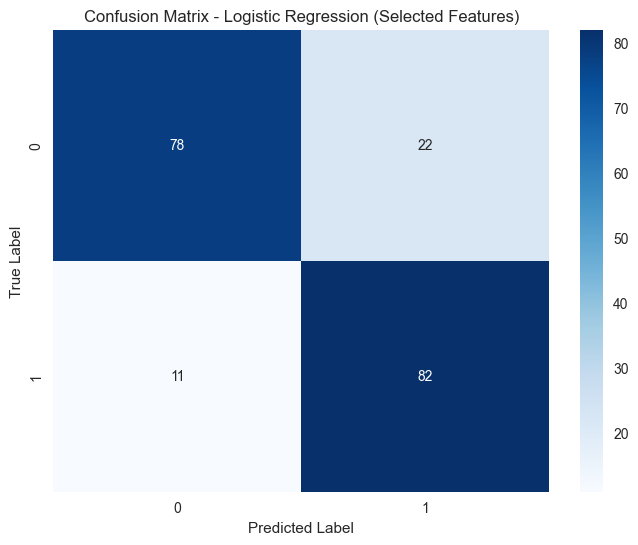


Decision Tree (Selected Features) Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



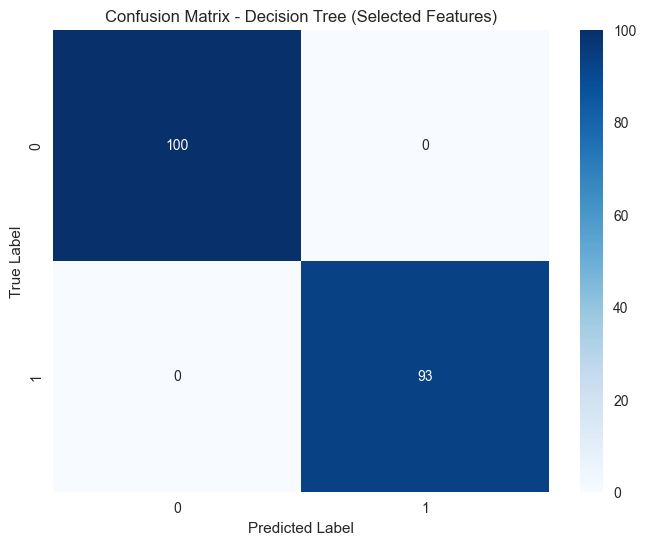


Random Forest (Selected Features) Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        93

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



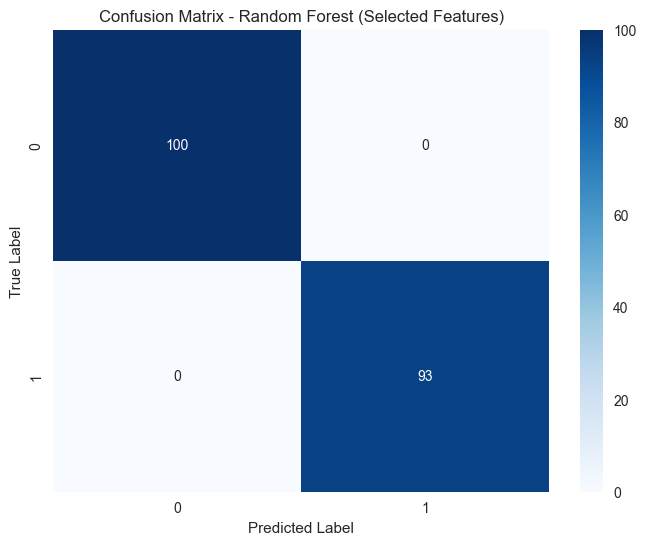


SGD Classifier (Selected Features) Results:
Accuracy: 0.8290

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       100
           1       0.79      0.88      0.83        93

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



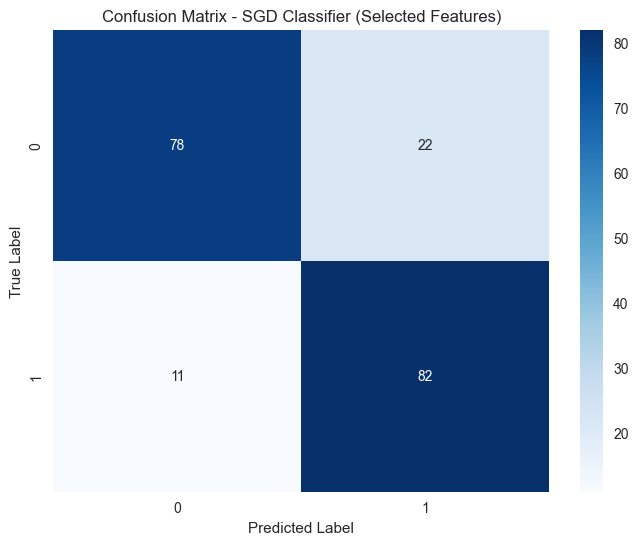


SVM (Selected Features) Results:
Accuracy: 0.9223

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       100
           1       0.89      0.96      0.92        93

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



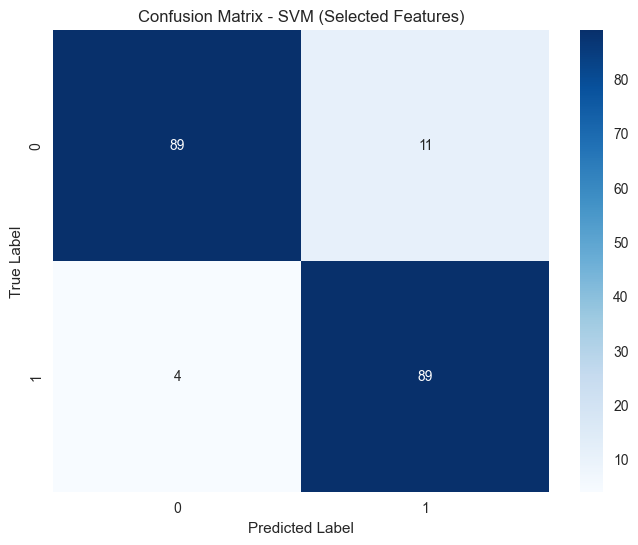

(SVC(C=10, random_state=42), 0.9222797927461139)

In [312]:
# Evaluate all models with selected features
print("\nModel Performance with Selected Features:")

# Logistic Regression
evaluate_model(lr_best, X_train_selected_scaled, X_test_selected_scaled, 
              y_train, y_test, "Logistic Regression (Selected Features)")

# Decision Tree
evaluate_model(dt_best, X_train_selected_scaled, X_test_selected_scaled, 
              y_train, y_test, "Decision Tree (Selected Features)")

# Random Forest
evaluate_model(rf_best, X_train_selected_scaled, X_test_selected_scaled, 
              y_train, y_test, "Random Forest (Selected Features)")

# SGD Classifier
evaluate_model(sgd_best, X_train_selected_scaled, X_test_selected_scaled, 
              y_train, y_test, "SGD Classifier (Selected Features)")

# SVM
evaluate_model(svm_best, X_train_selected_scaled, X_test_selected_scaled, 
              y_train, y_test, "SVM (Selected Features)")

## Conclusions

1. **Model Performance Comparison**:
   - Initial vs Tuned models
   - Full features vs Selected features
   
2. **Feature Importance**:
   - Most significant features for prediction
   - Impact of feature selection on model performance
   
3. **Best Performing Model**:
   - Which model performed best overall
   - Trade-offs between different models